In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from cell import Cell
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import copy

## first simulation growth without any abx as an integrity check

In [5]:
time_step = 0.1
param1 = {"ribo_min": 0.5, 
         "p_in": 1, 
         "p_out": 1, 
         "k_on": 1, 
         "k_off": 1, 
         "alpha": 0.05, # ribosome synthesis rate
         "beta": 0.05, # translation rate
         "gama": 0.01, # cell wall synthesis rate
         "abx_env": 0, 
         "t_start": 10000, 
         "t_end": -1}
my_sim1 = Cell(**param1)
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
length = 300
t_eval = np.arange(0, length, time_step)
time_series1 = my_sim1.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 999/1000 [00:00<00:00, 328868.20‰/s]


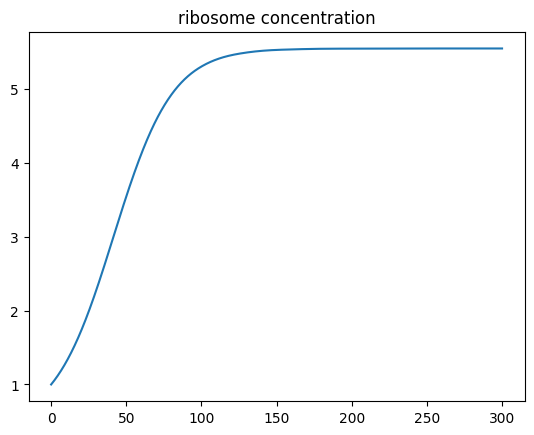

In [7]:
plt.plot(time_series1.t, time_series1.y[1])
plt.title("ribosome concentration")
plt.show()

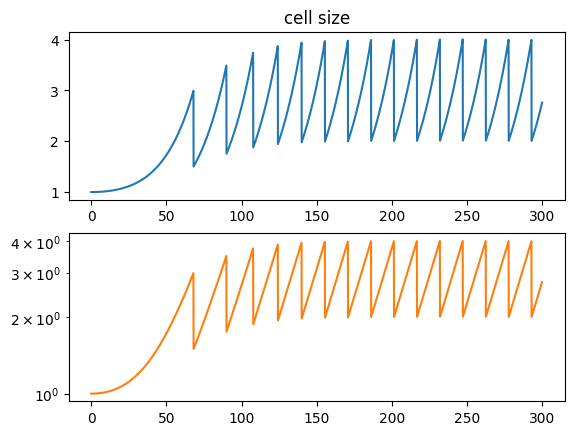

In [9]:
cell_size1 = my_sim1.set_adder_trace(adder_constant=2)
fig2, ax = plt.subplots(2)
ax[0].plot(time_series1.t, cell_size1)
# ax_twin = ax.twinx()
# ax_twin.plot(time_series.t, cell_size, color="C1")
# ax_twin.set_yscale('log')
ax[1].plot(time_series1.t, cell_size1, color="C1")
ax[1].set_yscale('log')
ax[0].set(title="cell size")
plt.show()

## try a treatment + recovery

In [76]:
admin_time = 150
recovery_time = 250
param2 = {"ribo_min": 0.5, 
          "p_in": 1, 
          "p_out": 1, 
          "k_on": 3, 
          "k_off": 0.1, 
          "alpha": 0.05, # ribosome synthesis rate
          "beta": 0.05, # translation rate
          "gama": 0.1, # cell wall synthesis rate
          "abx_env": 1, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim2 = Cell(**param2)
length = 400
t_eval = np.arange(0, length, time_step)
time_series2 = my_sim2.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 21891.85‰/s]


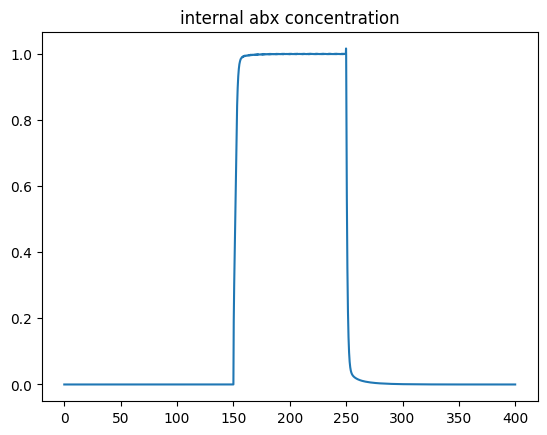

In [77]:
plt.plot(time_series2.t, time_series2.y[0])
plt.title("internal abx concentration")
plt.show()

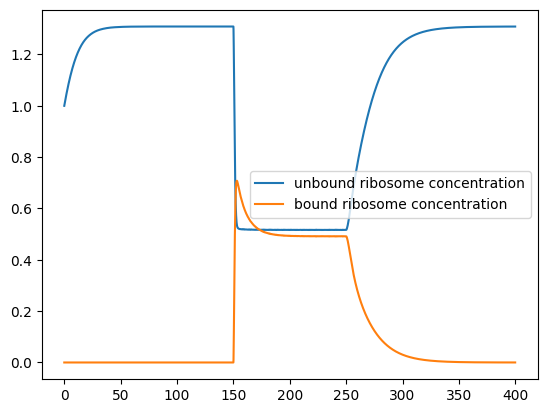

In [78]:
plt.plot(time_series2.t, time_series2.y[1], label="unbound ribosome concentration")
plt.plot(time_series2.t, time_series2.y[2], label="bound ribosome concentration")
plt.legend()
plt.show()

0.308938499485647


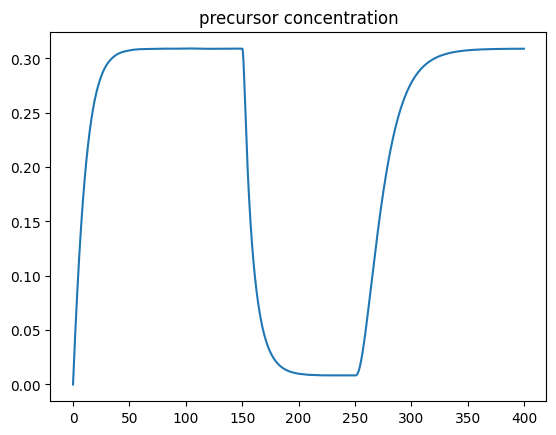

In [79]:
plt.plot(time_series2.t, time_series2.y[3])
plt.title("precursor concentration")
print(time_series2.y[3][-1])
plt.show()

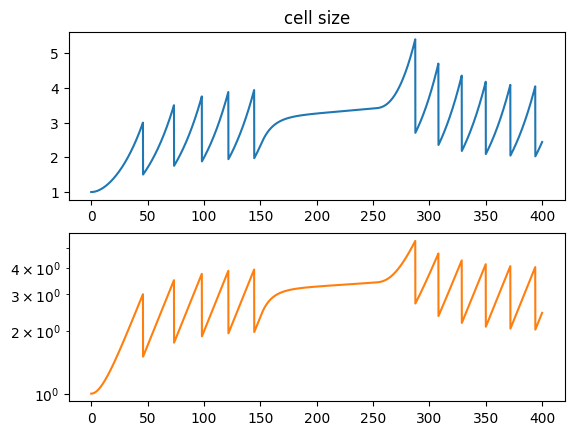

In [80]:
cell_size2 = my_sim2.set_adder_trace(adder_constant=2)
fig2, ax = plt.subplots(2)
ax[0].plot(time_series2.t, cell_size2)
# ax_twin = ax.twinx()
# ax_twin.plot(time_series.t, cell_size, color="C1")
# ax_twin.set_yscale('log')
ax[1].plot(time_series2.t, cell_size2, color="C1")
ax[1].set_yscale('log')
ax[0].set(title="cell size")
plt.show()